# Introducción al Aprendizaje Automatizado

## Trabajo Práctico Nro 0

## Inés Cipullo

###2023

## Ejercicios a y b
La siguiente clase permite generar dataframes panda donde los datos tienen `d` inputs reales correspondientes a la posición del punto en un espacio `d`-dimensional y `1` output binario que corresponde a la categoría a la que pertenece el punto. Para instanciarla, toma los valores enteros `dimension` (`d`) y `sample_size` (`n`), y el valor real `C` como parámetros. 

El sample A genera puntos provenientes de una distribución normal con matríz de covarianza diagonal, desvío estándar `C * sqrt(d)` y centro en `(1,1,..,1)` para la categoría `1`, y centro en `(-1,-1,..,-1)` para la categoría `0`.

El sample B genera puntos provenientes de una distribución normal con matríz de covarianza diagonal, desvío estándar `C` y centro en `(1,0,..,0)` para la categoría `1`, y centro en `(-1,0,..,0)` para la categoría `0`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MultidimensionalGaussianDistribution:
	"""Generate multidimensional points sample according to the Gaussian Distribution.

	Values generated equally in two different categories.
	Sample A:
	0: gaussian distribution with center (-1, -1, ..., -1)
	1: gaussian distribution with center (1, 1, ..., 1)
	Sample B:
	0: gaussian distribution with center (-1, 0, ..., 0)
	1: gaussian distribution with center (1, 0, ..., 0)
	"""

	def __init__(self, dimension: int, sample_size: int, C: float):
		self.dimension = dimension
		self.sample_size = sample_size
		self.C = C

	def generate_sample_a(self):
		center_0 = np.ones(self.dimension) * -1
		center_1 = np.ones(self.dimension)
		variance = (self.C * np.sqrt(self.dimension))**2

		sample_0 = self._sample_with_center_and_variance(center_0, variance, 0)
		sample_1 = self._sample_with_center_and_variance(center_1, variance, 1)

		columns = [f"Dim{i+1}" for i in range(self.dimension)]
		columns.append("Class")

		dataframe = pd.DataFrame(sample_0+sample_1, columns=columns)
		return dataframe

	def generate_sample_b(self):
		center_0 = np.append(np.ones(1)*-1, np.zeros(self.dimension-1))
		center_1 = np.append(np.ones(1), np.zeros(self.dimension-1))
		variance = self.C**2

		sample_0 = self._sample_with_center_and_variance(center_0, variance, 0)
		sample_1 = self._sample_with_center_and_variance(center_1, variance, 1)

		columns = [f"Dim{i+1}" for i in range(self.dimension)]
		columns.append("Class")

		dataframe = pd.DataFrame(sample_0+sample_1, columns=columns)
		return dataframe


	def _sample_with_center_and_variance(self, center, variance, category):
		covariance_matrix = np.identity(self.dimension) * variance
		
		sample = np.random.multivariate_normal(mean=center, cov=covariance_matrix, size=self.sample_size//2)

		sample_with_class = [point + [category] for point in sample.tolist()]
		return sample_with_class

La siguiente función `plot` toma un dataframe panda generado con `MultidimensionalGaussianDistribution` de dimension `2` y lo plotea.

In [ ]:
def plot(dataframe):
	colors = dataframe["Class"].map({0: 'b', 1: 'r'})
	dataframe.plot(x="Dim1", y="Dim2", kind='scatter', c=colors)
	plt.show()

Para testear los datos generados por `MultidimensionalGaussianDistribution`, utilizamos la siguiente función de test, que genera conjuntos con ciertos valores de entrada y los grafica si son de 2 dimensiones o muestra la media y la desviación estandar de la muestra si no.

In [ ]:
def testMultidimensionalGaussianDistribution(d: int, n: int , C: float):
  print(f"Test d={d}, n={n}, C={C}")
  data_gen = MultidimensionalGaussianDistribution(dimension=d, sample_size=n, C=C)
  print("Sample A:")
  df_a = data_gen.generate_sample_a()
  if d == 2:
    plot(df_a)
  else:
    print("Media: \n", df_a.groupby(["Class"]).mean())
    print("Desvio Estandar: \n", df_a.groupby(["Class"]).std())
  
  df_b = data_gen.generate_sample_b()
  print("Sample B:")
  if d == 2:
    plot(df_b)
  else:
    print("Media: \n", df_b.groupby(["Class"]).mean())
    print("Desvio Estandar: \n", df_b.groupby(["Class"]).std())

testMultidimensionalGaussianDistribution(d=2, n=2000, C=0.75)
testMultidimensionalGaussianDistribution(d=4, n=5000, C=2.00)

### Resultados del test

Tests con `d=2`, `n=2000` y `C=0.75`, se grafican los conjuntos de datos obtenidos de cada muestra, en azul los puntos pertenecientes a la clase `0` y en rojo los pertenientes a la clase `1`.

Sample A:

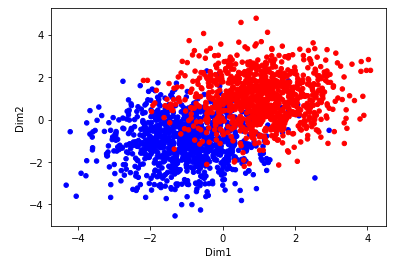

Sample B:

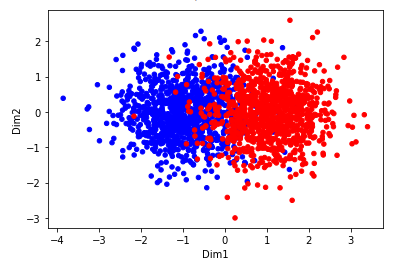

Observamos que ambos gráficos reflejan distribuciones normales de dos dimensiones con sus respectivos centros.

Tests con `d=4`, `n=5000` y `C=2.00`, si bien no lo podemos graficar, se muestran los centros y el desvío estandar de cada clase.

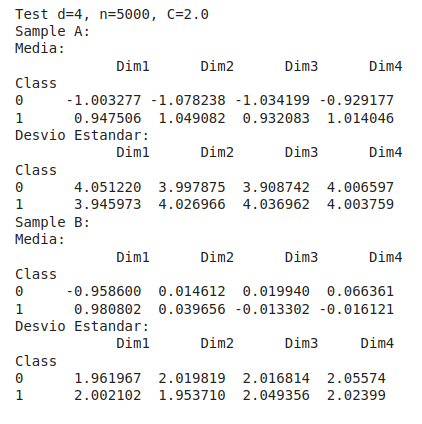

Podemos comprobar que en la muestra A los centros son `~(-1,-1,-1,-1)` para la clase `0` y `~(1,1,1,1)` para la clase `1`, y el desvío estandar para ambas clases es `~4 (C * sqrt(d))`. En la muestra B, comprobamos que los centros son `~(-1,0,0,0)` para la clase `0` y `~(1,0,0,0)` para la clase `1`, y el desvío estandar es `~2 (C)` para ambas clases. 

### Ejercicio c
La siguiente clase permite generar dataframes panda donde los datos tienen `2` inputs reales correspondientes a la posición del punto en un espacio bidimensional `x-y` y `1` output binario que corresponde a la categoría a la que pertenece el punto. Para instanciarla, toma el valor entero `sample_size` (`n`) como parámetro. 

Los puntos son generados aleatoriamente con una distribución uniforme dentro de un círculo de radio `1`. La categoría `0` corresponde a los puntos que se encuentran entre las curvas `radius = theta / (4pi)` y `radius = (theta + pi) / (4pi)` y la categoría `1` al resto de puntos.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Circular2DUniformDistribution:
	def __init__(self, sample_size: int):
		self.sample_size = sample_size
		self.dimension = 2
		self.radius = 1

	def generate_sample(self):
		count = {"0": 0, "1": 0}
		cat_size = self.sample_size // 2
		x_values = []
		y_values = []
		categories = []

		while count["0"] < cat_size or count["1"] < cat_size:
			theta = np.random.uniform(0, 2*np.pi, 1).tolist()[0]
			radius = np.sqrt(np.random.uniform(0, self.radius, 1).tolist()[0])
			category = self._get_category(theta, radius)

			if count[f"{category}"] < cat_size:
				count[f"{category}"] += 1
				x_values.append(radius * np.cos(theta))
				y_values.append(radius * np.sin(theta))
				categories.append(category)

		return pd.DataFrame({"X": x_values, "Y": y_values, "Class": categories})

	def _get_category(self, theta, ro):
		r1 = self._curve_1(theta)
		r2 = self._curve_2(theta)
		if r1 < ro and ro < r2:
			return 0

		r1p = self._curve_1(theta + 2 * np.pi)
		r2p = self._curve_2(theta + 2 * np.pi)
		if r1p < ro and ro < r2p:
			return 0
	
		return 1

	def _curve_1(self, theta):
		return theta / (4 * np.pi)
	
	def _curve_2(self, theta):
		return (theta + np.pi) / (4 * np.pi)

La siguiente función `plot2` toma un dataframe panda generado con `Circular2DUniformDistribution` y lo plotea.

In [ ]:
def plot2(dataframe):
	colors = dataframe["Class"].map({0: 'b', 1: 'r'})
	dataframe.plot(x="X", y="Y", kind='scatter', c=colors)
	plt.show()

Para testear los datos generados por `Circular2DUniformDistribution` utilizamos la siguiente función de test que genera un sample de cierto tamaño y lo plotea.

In [ ]:
def testCircular2DUniformDistribution(n: int):
  data_gen = Circular2DUniformDistribution(n)
  df = data_gen.generate_sample()
  plot2(df)

testCircular2DUniformDistribution(2000)

### Resultados del test

A continuación, el gráfico generado para `n=2000`, y el gráfico provisto como ejemplo, respectivamente:

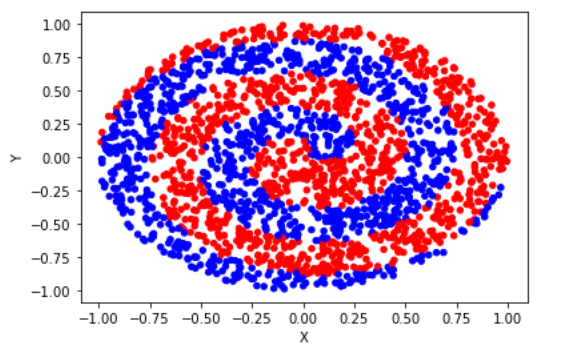
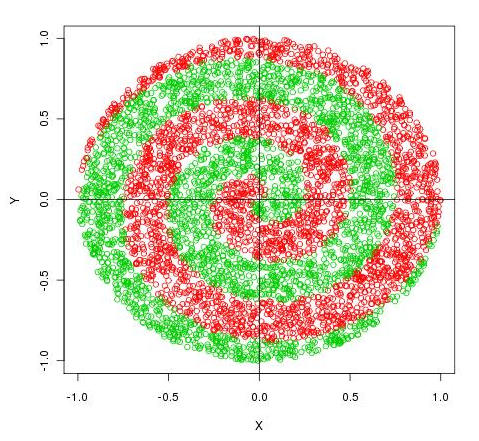


Notamos que los puntos generados corresponden efectivamente a una distribución uniforme y comparando ambos gráficos, vemos que son altamente similares, aunque el provisto como ejemplo pareciera tener más puntos.